# Project Deliverable 1 - Group 33

Group Members: Bethany Findlay, Charlotte Albert, Kaykay Akpama, Kosi Udechukwu

## Dataset Choice
o Select one dataset challenge from the Kaggle pool (see below).

o Explain why your team chose this dataset: interest, feasibility, data type, potential for learning, etc.

## Data Dictionary
o Document the features (input variables) and target variable.

o Describe each feature in your own words using the Kaggle dataset description or metadata from other sources.

o Include units (if applicable) and note categorical vs. numerical variables.

## Exploratory Data Analysis (EDA)

o Summarize dataset size and structure.

o Provide descriptive statistics for numerical features.

o Show distributions and visualizations of key variables.

o Check for missing values, outliers, or anomalies.

o Explore correlations or relationships among features.

Install dependencies and read dataset as df

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# read the CSV
df = pd.read_csv('train.csv')

### Dataset size, structure, and descriptive statistics
The dataset has the following columns:
- id (object): the unique identifier for each trip
- vendor_id (integer): the code indicating the provider associated with the trip record
- pickup_datetime (object): date and time when the meter was engaged
- dropoff_datetime (object): date and time when the meter was disengaged
- passenger_count (integer): the number of passengers in the vehicle, entered by driver
- pickup_longitude (float): longitude where the meter was engaged
- pickup_latitude (float): latitude where the meter was engaged
- dropoff_longitude (float): the longitude where the meter was disengaged
- dropoff_latitude (float): the latitude where the meter was disengaged
- store_and_fwd_flag (object): indicates whether the trip record was held in vehicle memory before sending to the vender because the vehicle did not have a connection to the server. 
Y = store and forward; N = not a store and forward trip
- trip_duration (int): duration of the trip in seconds

In [10]:
print(df.head())
# number of rows and columns
df.shape

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

(1458644, 11)

In [11]:
# show number of records in each column, type of data, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [12]:
# statistical summary (count, mean, std, min, max, quartiles)
df.describe(include = "all")

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


In [13]:
# ensure the object data types are converted to standard datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')
# check if there are values that could not be converted
df['pickup_datetime'].isna().sum()
df['dropoff_datetime'].isna().sum()

0

Relationship visualization

<Axes: xlabel='passenger_count', ylabel='Count'>

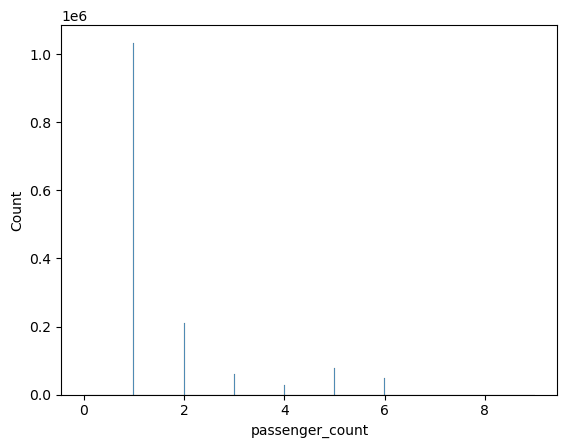

In [15]:
sns.histplot(df['passenger_count'])
#sns.relplot(data=df, x=)


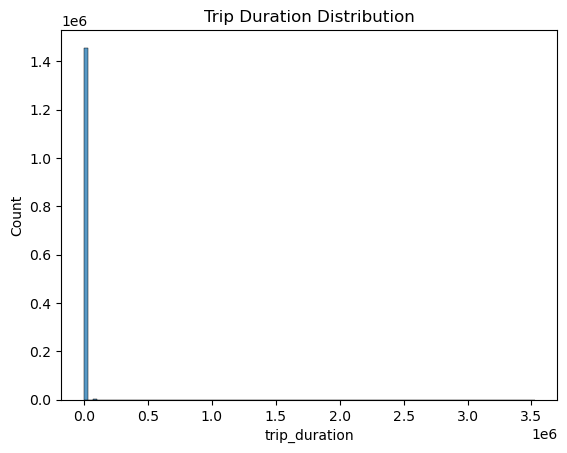

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your actual dataset
df = pd.read_csv('train.csv')

# Plot the histogram
sns.histplot(data=df, x='trip_duration', bins=100)
plt.title('Trip Duration Distribution')
plt.show()


Text(0.5, 1.0, 'Trip Duration Distribution (Trips ≤ 1 Hour)')

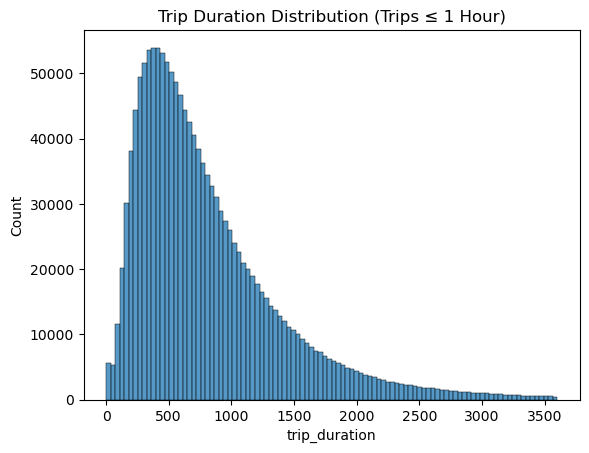

In [17]:
# filter trips less than or equal to 1 hour (3600 seconds) to get more useful data 
df_under_1hr = df[df['trip_duration'] <= 3600]
sns.histplot(df_under_1hr['trip_duration'], bins=100)
plt.title('Trip Duration Distribution (Trips ≤ 1 Hour)')

In [18]:
#identify number of trips that are longer than 3 hours(unusual likely error)
long_trips = df[df['trip_duration'] > 10800]
print(f"Trips longer than 3 hours: {len(long_trips)}")

Trips longer than 3 hours: 2112


In [19]:
#identify number of trips that are under a minute(unusual likely error)
short_trips = df[df['trip_duration'] < 60]
print(f"Trips shorter than 1 minute: {len(short_trips)}")

Trips shorter than 1 minute: 8595


In [20]:
# identify trips with passenger counts that are 0 and passenger counts over 6(unusual likely error)
print(df[df['passenger_count'] == 0].shape[0])
print(df[df['passenger_count'] > 6].shape[0])

60
5


In [21]:
#identify trips whose pickup are outside of the longitude/latitude of NYC (40.5° N to 40.9° N latitude and -74.27° W to -73.68° W longitude)
invalid_pickup = df[
    (df['pickup_longitude'] < -74.27) | (df['pickup_longitude'] > -73.68) |
    (df['pickup_latitude'] < 40.5) | (df['pickup_latitude'] > 40.9)
]

print(f"Invalid pickup coordinates: {len(invalid_pickup)}")

Invalid pickup coordinates: 317


Text(0.5, 1.0, 'Trip Duration vs Pickup Hour (Trips ≤ 1 Hour)')

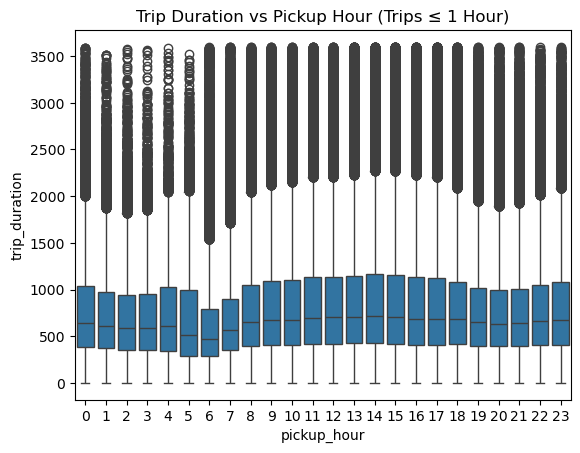

In [22]:
#identify the relationship between the pickup hour and the trip duration
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df.dropna(subset=['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df_under_1hr['pickup_datetime'] = pd.to_datetime(df_under_1hr['pickup_datetime'], errors='coerce')
df_under_1hr = df_under_1hr.dropna(subset=['pickup_datetime'])
df_under_1hr['pickup_hour'] = df_under_1hr['pickup_datetime'].dt.hour

sns.boxplot(x='pickup_hour', y='trip_duration', data=df_under_1hr)
plt.title("Trip Duration vs Pickup Hour (Trips ≤ 1 Hour)")


(40.5, 40.9)

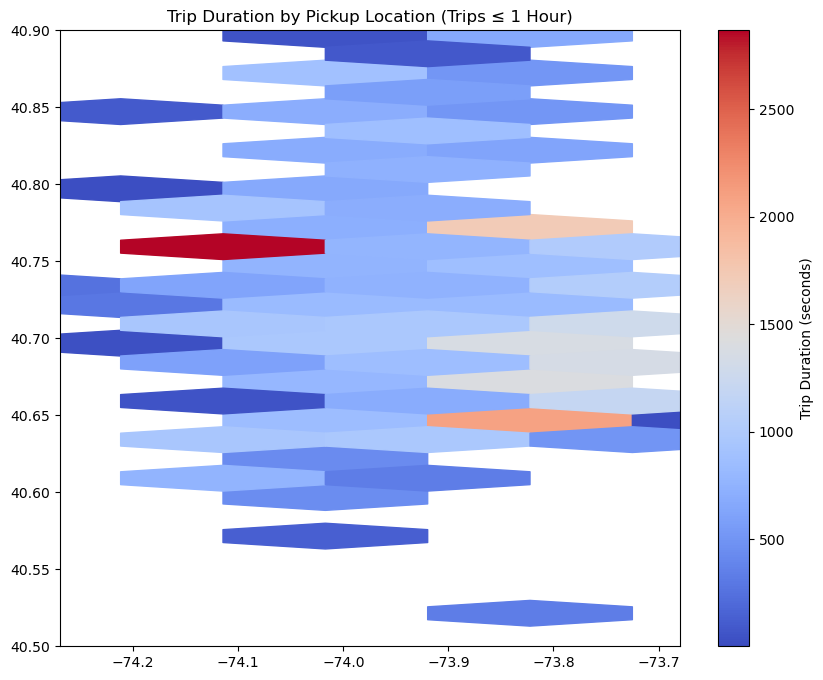

In [23]:
df_sample = df[df['trip_duration'] <= 3600].sample(100000)

#pick up location vs trip duration 
plt.figure(figsize=(10, 8))
hb = plt.hexbin(
    x=df_sample['pickup_longitude'],
    y=df_sample['pickup_latitude'],
    C=df_sample['trip_duration'],  
    gridsize=250,
    cmap='coolwarm'
)
plt.colorbar(hb, label='Trip Duration (seconds)')
plt.title("Trip Duration by Pickup Location (Trips ≤ 1 Hour)")

# NYC Coordinate bounds
plt.xlim(-74.27, -73.68)
plt.ylim(40.5, 40.9)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

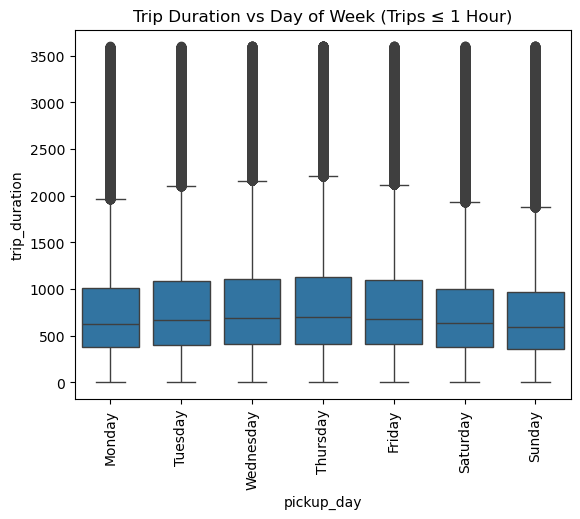

In [24]:
df_under_1hr['pickup_day'] = df_under_1hr['pickup_datetime'].dt.day_name()
sns.boxplot(x='pickup_day', y='trip_duration', data=df_under_1hr, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Trip Duration vs Day of Week (Trips ≤ 1 Hour)")
plt.xticks(rotation=90)


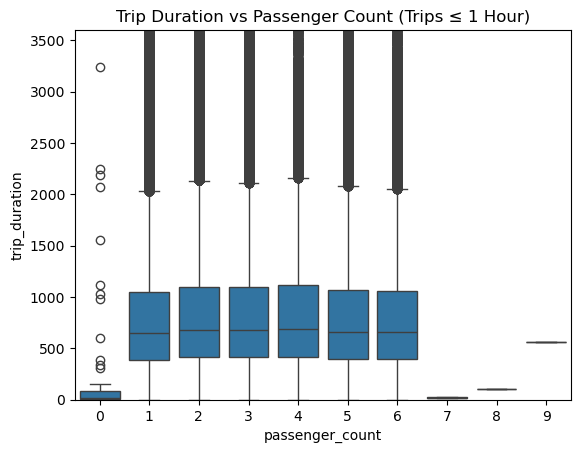

In [25]:
sns.boxplot(x='passenger_count', y='trip_duration', data=df_under_1hr)
plt.title("Trip Duration vs Passenger Count (Trips ≤ 1 Hour)")
plt.ylim(0, 3600)  # keep it readable
plt.show()


## Challenges and Strategies

o Identify potential difficulties based on the EDA carried out in step 3 (eg., missing values, outliers, high dimensionality, multicollinearity, imbalance, noise, etc.).

o Propose and apply potential strategies to address them (e.g., imputation, scaling, feature selection, etc.).


# Assistant
The error occurs because you're trying to use the `sns` (seaborn) library without importing it first. You also need to import matplotlib.pyplot for the plt commands.

Would you like me to provide the corrected code?

## Individual Contributions